<a href="https://colab.research.google.com/github/jjyjung/ai/blob/gh-pages/algo2023_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Maze (미로)**

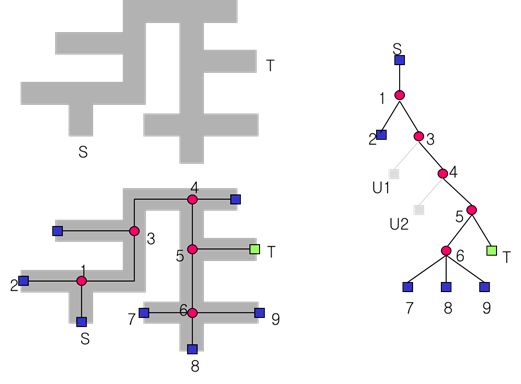

In [ ]:
my_maze = {'S':{'1'},
    '1':{'2','3'},
    '3':{'U1','4'},
    '4':{'U2','5'},
    '5':{'6','T'},
    '6':{'7','8','9'},
    }

In [ ]:
import sys

prev ={}
visited = []
def maze(G, v):
  visited.append(v); print(v, end='-')
  if v=='T':
    # return "성공"
    print("성공");
    print(visited)
    sys.exit()        # 재귀적 호출에서 강제종료를 시킬 수 있음
  if v in G.keys():
    for x in G[v]:
      if x not in visited:
        prev[x] = v
        maze(G, x)

print(maze(my_maze, "S"))

S-1-3-4-5-6-7-9-8-T-성공
['S', '1', '3', '4', '5', '6', '7', '9', '8', 'T']


SystemExit: ignored

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


**Coloring**

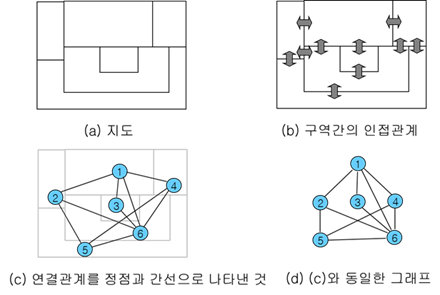

In [ ]:
my_color = {
     1:{2,3,4,6},
     2:{1,5,6},
     3:{1,6},
     4:{1,5,6},
     5:{2,4,6},
     6:{1,2,3,4,5}
}

In [ ]:
color = {}
def kColoring(G, i, c):
  if valid(G, i, c):
    color[i] = c
    if i==len(G): return True
    else:
      result = False
      d = 1
      while result==False and d<=k:
        result = kColoring(G, i+1, d)
        d += 1
    return result
  else:
    return False

def valid(G, i, c):
  for j in range(i):
    if (j in G[i]) and (j in color) and (color[j]==c):
      return False
  print(i, c)
  return True

k=3
print(kColoring(my_color, 1, 1))
print(k, color)

1 1
2 2
3 2
4 2
5 1
6 3
True
3 {1: 1, 2: 2, 3: 2, 4: 2, 5: 1, 6: 3}


**A_star Algorithm**

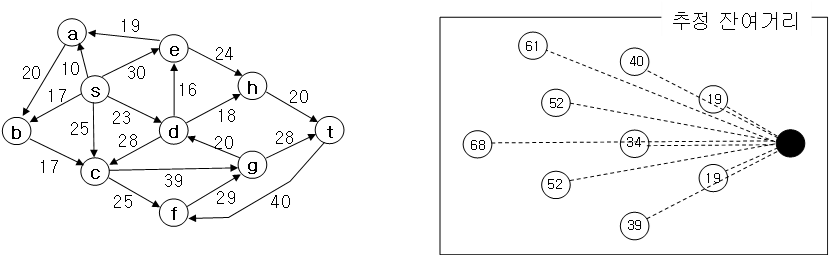

In [ ]:
my_tsp = [[0,10,10,30,25],
          [10,0,14,21,10],
          [10,18,0,7,9],
          [8,11,7,0,3],
          [14,10,10,3,0]]

In [ ]:
my_graph = {"s":{"a":10, "b":17, "c":25, "d":23, "e":30},
            "a":{"b":20},
            "b":{"c":17},
            "c":{"f":25, "g":39},
            "d":{"c":28, "e":16, "h":18},
            "e":{"a":19, "h":24},
            "f":{"g":29},
            "g":{"d":20, "t":28},
            "h":{"t":20},
            "t":{"f":40}}
my_h = {"s":52, "a":61, "b":68, "c":52, "d":34,
        "e":40, "f":39, "g":19, "h":19, "t":0}

In [1]:
my_graph = {"s":{"a":10, "b":17, "c":25, "d":23, "e":30},
            "a":{"b":20},
            "b":{"c":17},
            "c":{"f":25, "g":39},
            "d":{"c":28, "e":16, "h":18},
            "e":{"a":19, "h":24},
            "f":{"g":29},
            "g":{"d":20, "t":28},
            "h":{"t":20},
            "t":{"f":40}}
my_h = {"s":52, "a":61, "b":68, "c":52, "d":34,
        "e":40, "f":39, "g":19, "h":0, "t":19}

In [3]:
path=[]
visited=[]
def A_star(G,H,s,t):
  Q=list(G.keys())
  g={}; f={}; h={}
  prev={}
  for u in Q:
    g[u]=1000; f[u]=1000;
    h[u]=H[u]   #h[u]=0으로 가정하면 Dijkstra 알고리즘
  g[s]=0
  f[s]=h[s]
  while len(Q)>0:
    u = deleteMin(Q,f)
    visited.append(u)
    Q.remove(u)
    if u==t:
      find_path(prev,u)
      print("최적해:", g[u])
      print("최적경로:", path)
      print("방문경로:", visited)
      return
    else:
      for v in G[u].keys():
        if v in Q and g[u]+G[u][v]<g[v]:
          g[v]=g[u]+G[u][v]
          prev[v]=u
          f[v]=g[v]+h[v]

def deleteMin(Q, f):
  u = None
  mini = 1000
  for q in Q:
    if mini > f[q]:
      u=q; mini=f[q]
  return u

def find_path(prev,v):
  path.append(v)
  if v in prev.keys():
    find_path(prev,prev[v])

A_star(my_graph,my_h,"a","h")

최적해: 114
최적경로: ['h', 'd', 'g', 'c', 'b', 'a']
방문경로: ['a', 'b', 'c', 'g', 'f', 't', 'd', 'h']
